# Clustering coefficient

A high clustering coefficient indicates that nodes in the graph are more likely to form tightly connected clusters. The clustering coefficient measures how much nodes in a graph tend to cluster together. It quantifies the presence of triangles in the graph, where a triangle consists of three nodes that are all connected to each other.

In unweighted graphs, the clustering of a node $u$  is theratio between the number of existing triangles through node $u$ and the number of all possible triangles that go through $u$n
$$c(u) = \frac{2T(u)}{deg(u)(deg(u)-1)},$$
where $T(u)$ is the number of triangles going through node $u$ and $deg(u)$ and 
 is the de node $u$.gr ve edge weights [3].

For directed graphs, the clustering is similarly defined as the fraction of all possgoing through node $u$
$$c(u) = \frac{T(u)}{deg(u)(deg(u)-1) - 2deg^{\leftrightarrow}(u)},$$ where $T(u)$ is the number of directed triangles through the node ego, $deg(u)$ is the sum of in-degree and out-degree of ego, and $deg^{\leftrightarrow}(u)$ is the number nodes $v$ such that the network contains both edges ($u$,$v$) and ($v$,$u$).gr
 is the reciprocal degree of 
.

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

We will compute clustering coefficients for nodes in a small graph "manually". Then, we will compute it using `Networkx` library. Finally, we will apply the measure on a real-world network.

## Small Examples 

### Example 1

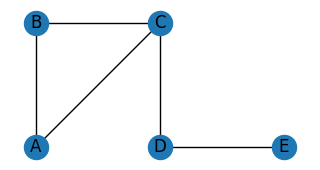

In [2]:
G = nx.Graph()
G.add_edges_from([('A','B'), ('A','C'), ('C','D'), ('B','C'), ('D','E') ])
positions = {'A': np.array([ 0,0]), 'B': np.array([0,1]), 'C': np.array([ 1,1]), 
             'D': np.array([1,0]), 'E': np.array([2,0])}
plt.figure(figsize=(3,1.5))
nx.draw(G, pos=positions)
_ = nx.draw_networkx_labels(G, positions)

Compute **manually** clustering coefficients for all nodes and average clustering coefficient for the whole network:

In [6]:
# clustering
G.nodes['A']['clustering'] = 1
G.nodes['B']['clustering'] = 1
G.nodes['C']['clustering'] = 1/3
G.nodes['D']['clustering'] = 0
G.nodes['E']['clustering'] = 0

# the average clustering coefficient
avg_clustering = np.mean([G.nodes[node]['clustering'] for node in G.nodes])
avg_clustering

0.4666666666666667

In [7]:
clustering_coefficient = nx.clustering(G)

for n in G.nodes():
    print(f"Clustering coefficient of node {n}: manually: {G.nodes[n]['clustering']}"
          f" networkx: {clustering_coefficient[n]}")

print(f"\nThe average clustering coefficient is:manually {avg_clustering} networkx {nx.average_clustering(G)}")

Clustering coefficient of node A: manually: 1 networkx: 1.0
Clustering coefficient of node B: manually: 1 networkx: 1.0
Clustering coefficient of node C: manually: 0.3333333333333333 networkx: 0.3333333333333333
Clustering coefficient of node D: manually: 0 networkx: 0
Clustering coefficient of node E: manually: 0 networkx: 0

The average clustering coefficient is:manually 0.4666666666666667 networkx 0.4666666666666667


### Example 2

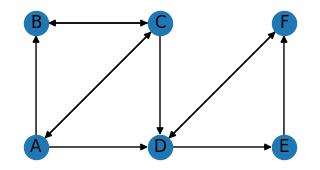

In [8]:
G = nx.DiGraph()
G.add_edges_from([('A','B'), ('A','C'), ('C','D'), ('B','C'), ('D','E'), 
                  ('A','D'), ('D','F'), ('E','F'), ('C','A'), ('C','B'),
                  ('F','D')])
positions = {'A': np.array([ 0,0]), 'B': np.array([0,1]), 'C': np.array([ 1,1]), 
             'D': np.array([1,0]), 'E': np.array([2,0]), 'F': np.array([2,1])}
plt.figure(figsize=(3,1.5))
nx.draw(G, pos=positions)
_ = nx.draw_networkx_labels(G, positions)

Compute manually normalized betweenness for all nodes and edges:

In [17]:
# clustering
#T(u)/(deg(u)*((deg(u)-1))-2*(number of doubles edges coming from u))

G.nodes['A']['clustering'] = 6/10
G.nodes['B']['clustering'] = 4/4
G.nodes['C']['clustering'] = 6/16
G.nodes['D']['clustering'] = 4/18
G.nodes['E']['clustering'] = 1
G.nodes['F']['clustering'] = 2/4

# the average clustering coefficient
avg_clustering = np.mean([G.nodes[node]['clustering'] for node in G.nodes])

In [18]:
clustering_coefficient = nx.clustering(G)

for n in G.nodes():
    print(f"Clustering coefficient of node {n}: manually: {G.nodes[n]['clustering']}"
          f" networkx: {clustering_coefficient[n]}")

print(f"\nThe average clustering coefficient is:manually {avg_clustering} networkx {nx.average_clustering(G)}")

Clustering coefficient of node A: manually: 0.6 networkx: 0.6
Clustering coefficient of node B: manually: 1.0 networkx: 1.0
Clustering coefficient of node C: manually: 0.375 networkx: 0.375
Clustering coefficient of node D: manually: 0.2222222222222222 networkx: 0.2222222222222222
Clustering coefficient of node E: manually: 1 networkx: 1.0
Clustering coefficient of node F: manually: 0.5 networkx: 0.5

The average clustering coefficient is:manually 0.6162037037037037 networkx 0.6162037037037037


## Real-World Example

We will use data on United Kingdom's suffragette activists. Collected by the authors of the following paper

>Crossley, N., Edwards, G., Harries, E., & Stevenson, R. (2012). Covert social movement networks and the secrecy-efficiency trade off: The case of the UK suffragettes (1906–1914). Social Networks, 34(4), 634-644. https://sites.google.com/site/ucinetsoftware/datasets/covert-networks/suffragettes

We will use the following code to load the data matrix 1216x398 person by arrest date and location (50 all 2M) and project it into a bipartite network. Some persons have two lines in the data file. We will merge perons with the same name. 

In [20]:
from pathlib import Path
from networkx import bipartite

# Create empty affiliation network and list of people
B = nx.Graph()

# peoples will be the first kind of nodes; we will collect them in a set
people = set()

# Load data file into network
with open('data/50_ALL_2M.csv') as f:
    # Parse header
    events = next(f).strip().split(",")[1:]

    # Parse rows
    for row in f:
        parts = row.strip().split(",")
        person = parts[0]
        people.add(person)
        for j, value in enumerate(parts[1:]):
            if value != "0":
                B.add_edge(person, events[j], weight=int(value))

# Project into person-person co-affilation network
G = bipartite.projected_graph(B, people)

Solve the following tasks:
1. Compute the clustering coefficients for nodes.
2. Sort nodes according to decreasing clustering coefficients.
3. Print 10 nodes with the highest clustering coefficients together with the respective value of the clustering coefficients.

In [22]:
from pprint import pprint

clustering_coeff = nx.clustering(G)
# your code goes here 

clustering_coeff_sorted = sorted(clustering_coeff.items(), key=lambda x: x[1], reverse=True)
pprint(clustering_coeff_sorted[:10])

[('Evelyn Scott', 1.0),
 ('Barbara Willie', 1.0),
 ('Mrs Wells', 1.0),
 ('18730 Unknown', 1.0),
 ('Mary Richards', 1.0),
 ('Gladys Evans', 1.0),
 ('18669 Unknown', 1.0),
 ('E Fricker', 1.0),
 ('Laura Morris', 1.0),
 ('Elsa Schuester', 1.0)]


Are these suffragettesvthe most important ones?

# Facebook Network Analysis

based on a [Networkx guide](https://networkx.org/nx-guides/content/exploratory_notebooks/facebook_notebook.html#betweenness-centrality).

Our data consists of the facebook circles (friends lists) of ten people. The dataset can be found at this link http://snap.stanford.edu/data/ego-Facebook.html. The network is undirected and has no weights. Each node represents an anonymized facebook user that belongs to one of those ten friends lists.
Each edge corresponds to the friendship of two facebook users that belong to this network. The ten original friends are the nodes $0, 107, 348, 414, 686, 698, 1684, 1912, 3437, 3980$, we will call them the **spotlight nodes**.

In [23]:
# import packages 
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint

We load the edges from a gziped data file into a pandas dataframe. 

In [24]:
facebook = pd.read_csv(
    "data/facebook_combined.txt.gz",
    compression="gzip",
    sep=" ",
    names=["start_node", "end_node"],
)
facebook

,start_node,end_node
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
88229,4026,4030
88230,4027,4031
88231,4027,4032
88232,4027,4038


We create the network from the `facebook` dataframe of the edges:

In [25]:
G = nx.from_pandas_edgelist(facebook, "start_node", "end_node")

Let us visualize the network.

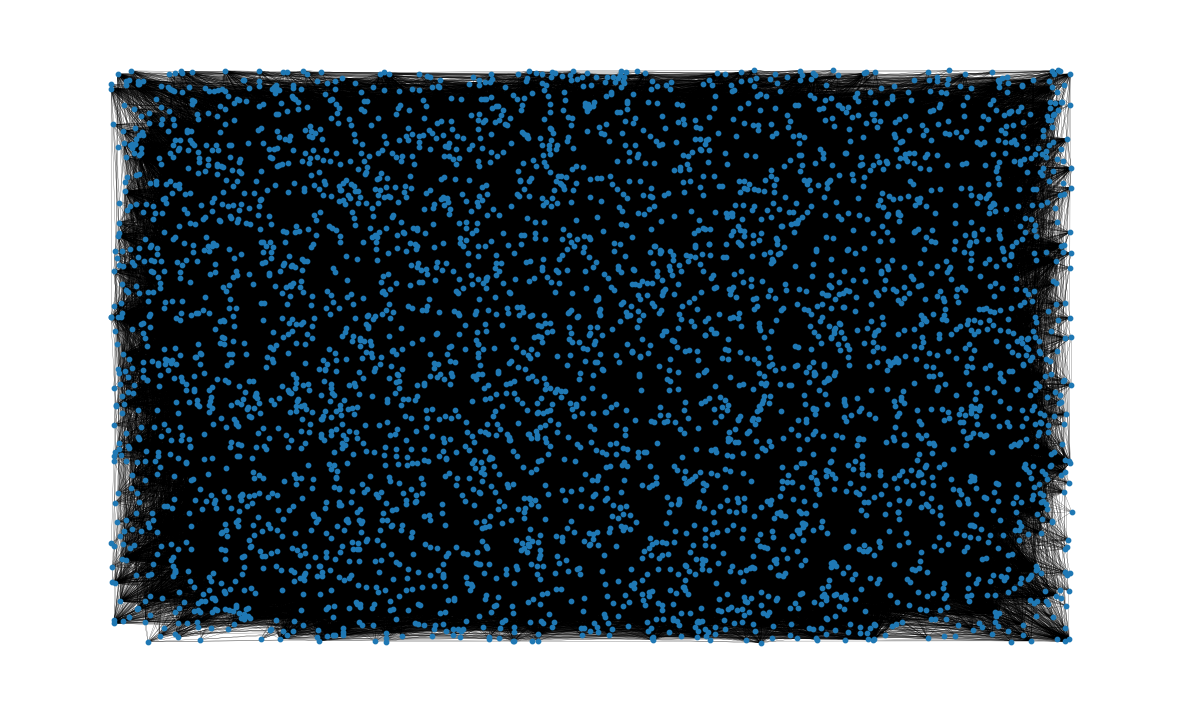

In [26]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

Such visualization is not helpful. Randomly positioned nodes are not useful. We can do better with `spring_layout`. However, we must limit the number of iterations to avoid long running time.


In [27]:
pos = nx.spring_layout(G, iterations=15, seed=1721)

In [28]:
spotlight_nodes = [0,107,348,414,686,698,1684,1912,3437,3980]

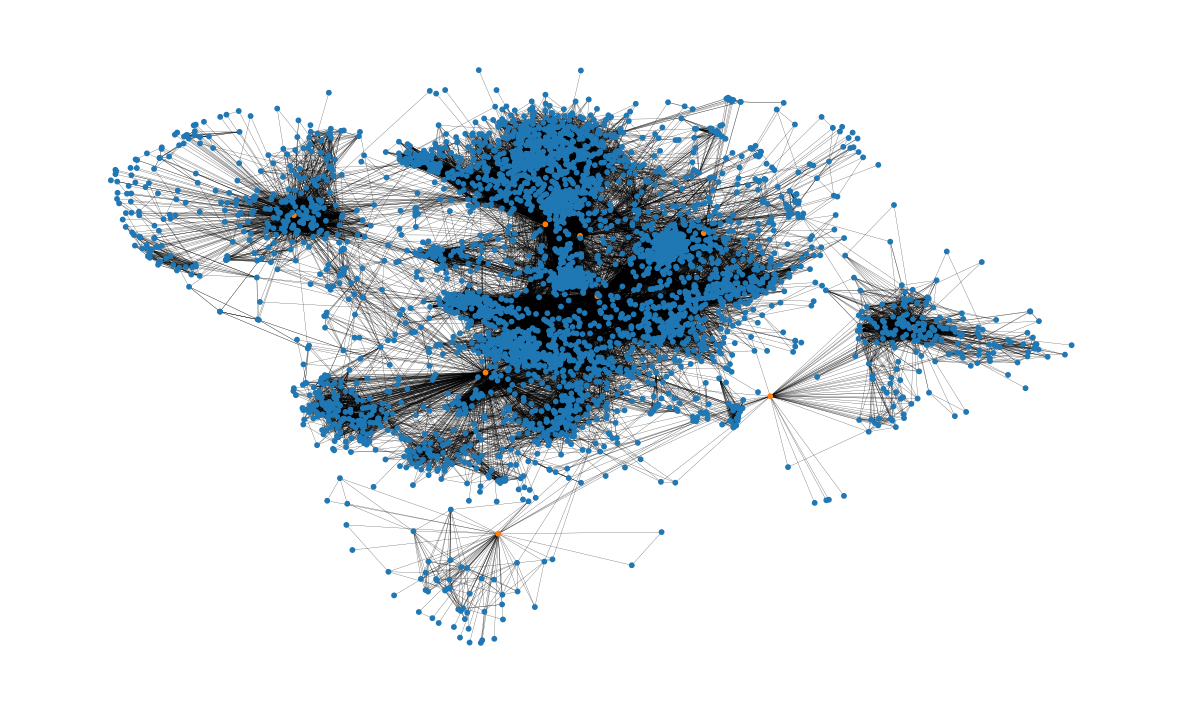

In [29]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
node_color = ['C1' if v in spotlight_nodes else 'C0' for v in G.nodes()]
nx.draw_networkx(G, pos=pos, ax=ax, node_size=10, with_labels=False, width=0.15, node_color=node_color)


In [30]:
print('Number of nodes:', G.number_of_nodes())
print('Number of edges:', G.number_of_edges())
print('Average degree:', 2*G.number_of_edges() / G.number_of_nodes())

Number of nodes: 4039
Number of edges: 88234
Average degree: 43.69101262688784


We already know degree centrality.

In [31]:
degree_centrality = nx.centrality.degree_centrality(G)  # save results in a variable to use again
(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(107, 0.258791480931154),
 (1684, 0.1961367013372957),
 (1912, 0.18697374938088163),
 (3437, 0.13546310054482416),
 (0, 0.08593363051015354),
 (2543, 0.07280832095096582),
 (2347, 0.07206537890044576),
 (1888, 0.0629024269440317)]

Text(0, 0.5, 'Counts')

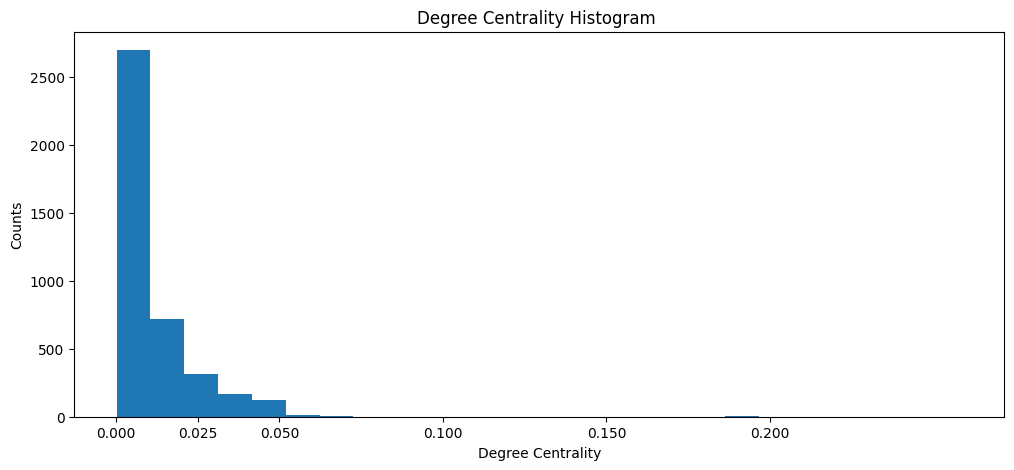

In [32]:
plt.figure(figsize=(12, 5))
plt.hist(degree_centrality.values(), bins=25)
plt.xticks(ticks=[0, 0.025, 0.05, 0.1, 0.15, 0.2])  # set the x axis ticks
plt.title("Degree Centrality Histogram ")
# plt.title("Degree Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Degree Centrality")
plt.ylabel("Counts")

Based on the degree centrality, we can vizualize the degrees.

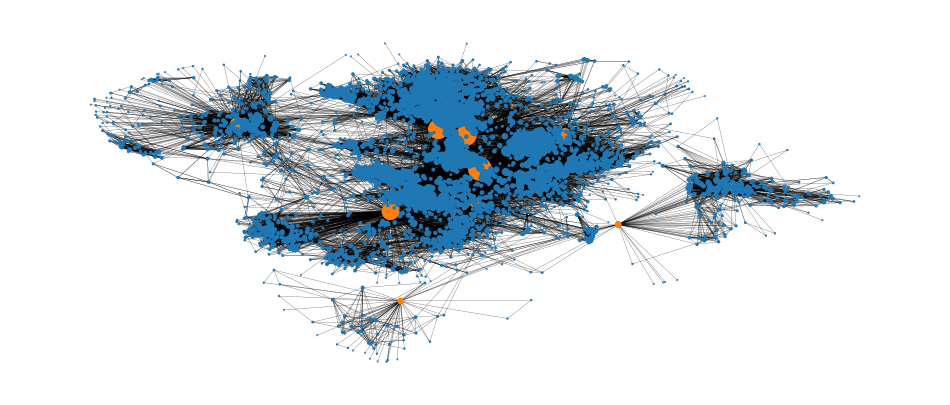

In [33]:
# set up nodes size for a nice graph representation
node_size = [v * 1000 for v in degree_centrality.values()] 
plt.figure(figsize=(12, 5))
nx.draw_networkx(G, pos=pos, node_size=node_size, node_color=node_color, with_labels=False, width=0.15)
_ = plt.axis("off")

Now, let us calculate clustering coefficients for the spotlight nodes.

In [34]:
clustering_coefficients_spotlight = nx.clustering(G, nodes=spotlight_nodes)
sorted_clustering_coeff = (sorted(clustering_coefficients_spotlight.items(), key=lambda item: item[1], reverse=True))
for node, coef in sorted_clustering_coeff:
    print(f"node {node} has degree {G.degree[node]} and clustering coefficient {coef}")

node 414 has degree 159 and clustering coefficient 0.1351803200382135
node 698 has degree 68 and clustering coefficient 0.13125548726953468
node 348 has degree 229 and clustering coefficient 0.12303684976633725
node 686 has degree 170 and clustering coefficient 0.11562826313957536
node 1912 has degree 755 and clustering coefficient 0.10548597326400477
node 3980 has degree 59 and clustering coefficient 0.0853302162478083
node 107 has degree 1045 and clustering coefficient 0.049038479165520905
node 1684 has degree 792 and clustering coefficient 0.044774546986936364
node 0 has degree 347 and clustering coefficient 0.04196165314587463
node 3437 has degree 547 and clustering coefficient 0.032230414314509376


<class 'dict'>
{0: array([-0.4845621 ,  0.17057358]), 107: array([ 0.06538033, -0.05103593]), 348: array([0.25826091, 0.1215866 ]), 414: array([ 0.05312555, -0.2159826 ]), 686: array([ 0.63862085, -0.13646053]), 698: array([ 0.37875873, -0.3249501 ]), 1684: array([0.03407808, 0.11389742]), 1912: array([-0.02893871,  0.14566825]), 3437: array([-0.13729364, -0.26026621]), 3980: array([-0.11425275, -0.70137995])}
[4.196165314587463, 4.903847916552091, 12.303684976633726, 13.51803200382135, 11.562826313957537, 13.125548726953468, 4.477454698693636, 10.548597326400477, 3.2230414314509375, 8.53302162478083]


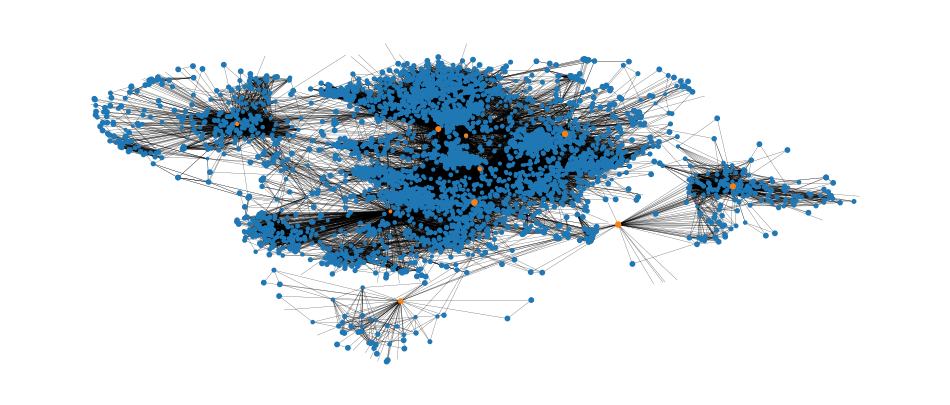

In [35]:
node_size = [v * 10 for v in nx.clustering(G).values()]  # set up nodes size for a nice graph representation
plt.figure(figsize=(12, 5))
nx.draw_networkx(G, pos=pos, node_size=node_size, node_color="C0", with_labels=False, width=0.15)
_ = plt.axis("off")
print(type(pos))
spotlight_nodes_pos = {node:pos[node] for node in spotlight_nodes}
spotlight_nodes_size = [v * 100 for v in nx.clustering(G, nodes=spotlight_nodes).values()]  # set up nodes size for a nice graph representation
print(spotlight_nodes_pos)
print(spotlight_nodes_size)
nx.draw_networkx_nodes(G, pos=spotlight_nodes_pos, nodelist=spotlight_nodes, node_size=spotlight_nodes_size, node_color='C1')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6a447d70-2d4d-4a9c-90a1-a8ec65543279' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>